In [1]:
import pandas as pd
import numpy as np
import math as m
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.stats import linregress

nan = float("nan")

Allometric functions that FATES currently uses.

In [2]:
def d2h_chave2014(d,p1,p2,p3):
    h = np.exp( p1 + p2*np.log(dbh_maxh) + p3*np.log(dbh_maxh)**2.0)
    return(h)

def d2h_poorter2006(d,p1,p2,p3):
    h = p1*(1.0 - np.exp(p2*d**p3))
    return(h)

def d2h_2pwr(d,p1,p2):
    h = p1*d**p2
    return(h)

def d2h_obrien(d,p1,p2):
    h = 10.0**(np.log10(d)*p1+p2)
    return(h)

def d2h_martcano(d,p1,p2,p3):
    h = (p1*d**p2)/(p3+d**p2)
    return(h)

def carea_2pwr(d, p1, p2):
    c = p1 * d ** p2
    return(c)

def d2blmax_salda(d,p1,p2,p3,rho):
    blmax = p1 * d**p2 * rho**p3
    return(blmax)

def d2blmax_2pwr(d,p1,p2):
    c2b = 2.0
    blmax    = (p1*d**p2) / c2b
    return(bllmax)
    

Data below is from Karlik and McKay et al., 2002 "Leaf Area Index, Leaf Mass Density, and Allometric Relationships Derived From Harvest of Blue Oaks in a California Oak Savanna"

In [3]:
k_mck_data = pd.DataFrame(data=
                          {'index': [1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                           'trunk_circumf': [202,77,45, 57, 75, 37, 57, 60, 132, 38, 59, 42, 68, 53],
                           'dbh': [64, 25, 14, 18, 24, 12, 18, 19, 42, 12, 19, 13, 22, 17],
                           'height': [7.4, 6.7, 4.7, 7.8, 7.5, 5.9, 7.2, 6.7, 9.9, 4.2, 6.8, 6.3, 7.5, 4.4],
                           'crown_radius': [1.1,2, 1.1, 1.4, 1.8, 1.2, 1.1, 1.5, 3.6, 1.1, 1.5, 1.2, 1.8, 2.1],
                           'leaf_mass': [3750, 975, 2210, 5230, 6790, 1950, 4420, 5380, 29300, 1830, 5230, 2200, 9040, 5930],
                           'leaf_area': [21.5, 58.8, 13.3, 31.5, 40.9, 11.8, 26.6, 32.4, 177, 11.1, 31.5, 13.3, 54.5, 35.70],
                           'LAI': [5.9, 4.7, 3.7, 5.5, 3.9, 2.5, 7.7, 4.8, 4.5, 2.8, 4.3, 2.9, 5.7, 2.6],
                           'sapwood_rings': [nan, 112, 89, 97, 130, 70, 113, 103, 172, 86, 76, 72, 95, 86],
                           'crown_depth': [4.4, 4.1, 3.2, 6.3, 4.5, 4.5, 5.6, 5.0, 7.5, 2.8, 4.5, 4.6, 5.5, 2.],
                           'crown_proj': [3.6, 13, 3.6, 5.7, 10, 4.7, 3.5, 6.8, 40, 4.0, 7.3, 4.5,9.6, 14]
                          })

0.8566356395739372 -1.0833653200268687


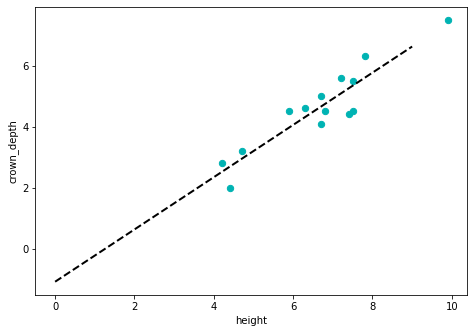

In [4]:
slope, intercept, r_value, p_value, std_err = linregress(k_mck_data.height,k_mck_data.crown_depth)
print(slope, intercept)
#k_mck_data.plot.scatter(x="height", y="crown_depth")
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('height')
ax.set_ylabel('crown_depth')
ax.scatter(k_mck_data.height, k_mck_data.crown_depth, s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(10), np.arange(10)*slope+intercept, linestyle='--', linewidth=2, color='black')


[  8.70428576   2.11939762 145.8126407 ]


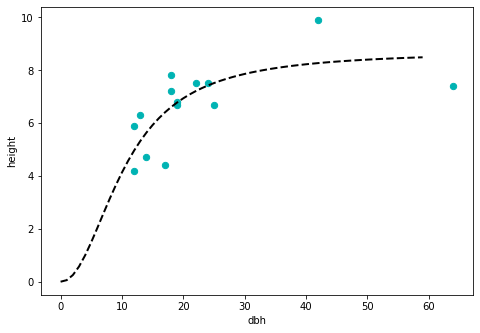

In [5]:
pars, cov = curve_fit(f=d2h_martcano, xdata=k_mck_data.dbh, ydata=k_mck_data.height, p0=[10,1,100])
print(pars)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh')
ax.set_ylabel('height')
ax.scatter(k_mck_data.dbh, k_mck_data.height, s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(60), d2h_martcano(np.arange(60), *pars), linestyle='--', linewidth=2, color='black')

[2.88877791 0.27472446]


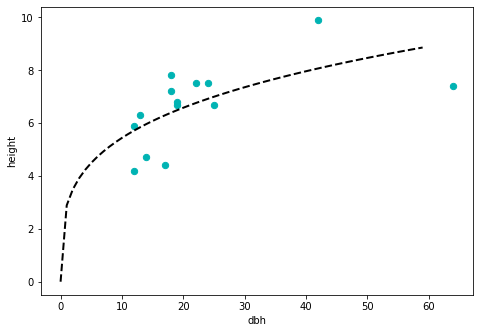

In [6]:
pars, cov = curve_fit(f=d2h_2pwr, xdata=k_mck_data.dbh, ydata=k_mck_data.height)
print(pars)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh')
ax.set_ylabel('height')
ax.scatter(k_mck_data.dbh, k_mck_data.height, s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(60), d2h_2pwr(np.arange(60), *pars), linestyle='--', linewidth=2, color='black')

[0.01693709 2.0742195 ]


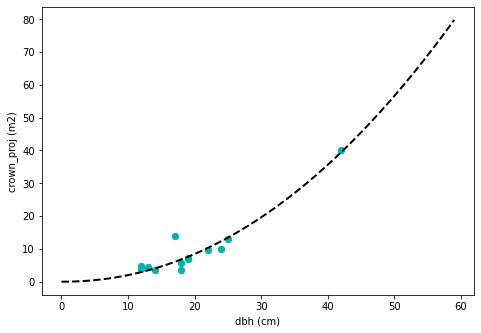

In [7]:
k_mck_data_nobad = k_mck_data.drop(index=0)  ## one of these trees is very weird.

pars, cov = curve_fit(f=carea_2pwr, xdata=k_mck_data_nobad.dbh, ydata=k_mck_data_nobad.crown_proj)
print(pars)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh (cm)')
ax.set_ylabel('crown_proj (m2)')
ax.scatter(k_mck_data_nobad.dbh, k_mck_data_nobad.crown_proj, s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(60), carea_2pwr(np.arange(60), *pars), linestyle='--', linewidth=2, color='black')

[4.04251916 2.37075189]


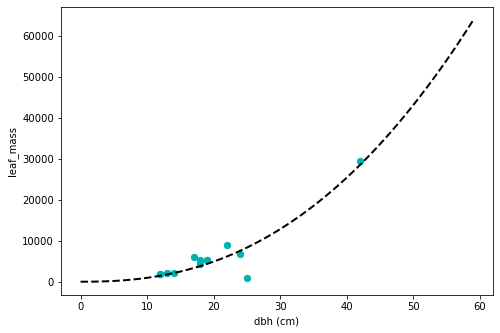

In [8]:
pars, cov = curve_fit(f=carea_2pwr, xdata=k_mck_data_nobad.dbh, ydata=k_mck_data_nobad.leaf_mass)
print(pars)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xlabel('dbh (cm)')
ax.set_ylabel('leaf_mass')
ax.scatter(k_mck_data_nobad.dbh, k_mck_data_nobad.leaf_mass, s=40, color='#00b3b3', label='Data')
ax.plot(np.arange(60), carea_2pwr(np.arange(60), *pars), linestyle='--', linewidth=2, color='black')